In [382]:
import jinja2

import importlib
import os
import sys
sys.path.insert(0, os.path.abspath('.'))

import components
importlib.reload(components)
from components import *

In [405]:
H = Model(config_file='general_config_file.yaml', elements_list='elements_list.yaml')
H.initialize_hubs()
H.build_environment_level_variables_and_constraints(log=False)
H.connect_environments()
H.add_hubs_equations_to_model()
H.solve()

hub_electricity_house and hub_electricity_car connected
hub_electricity_module and hub_electricity_car connected
hub_electricity_module and hub_electricity_house connected
Problem solved with status: Optimal


100%|██████████| 168/168 [00:00<00:00, 7962.88it/s]


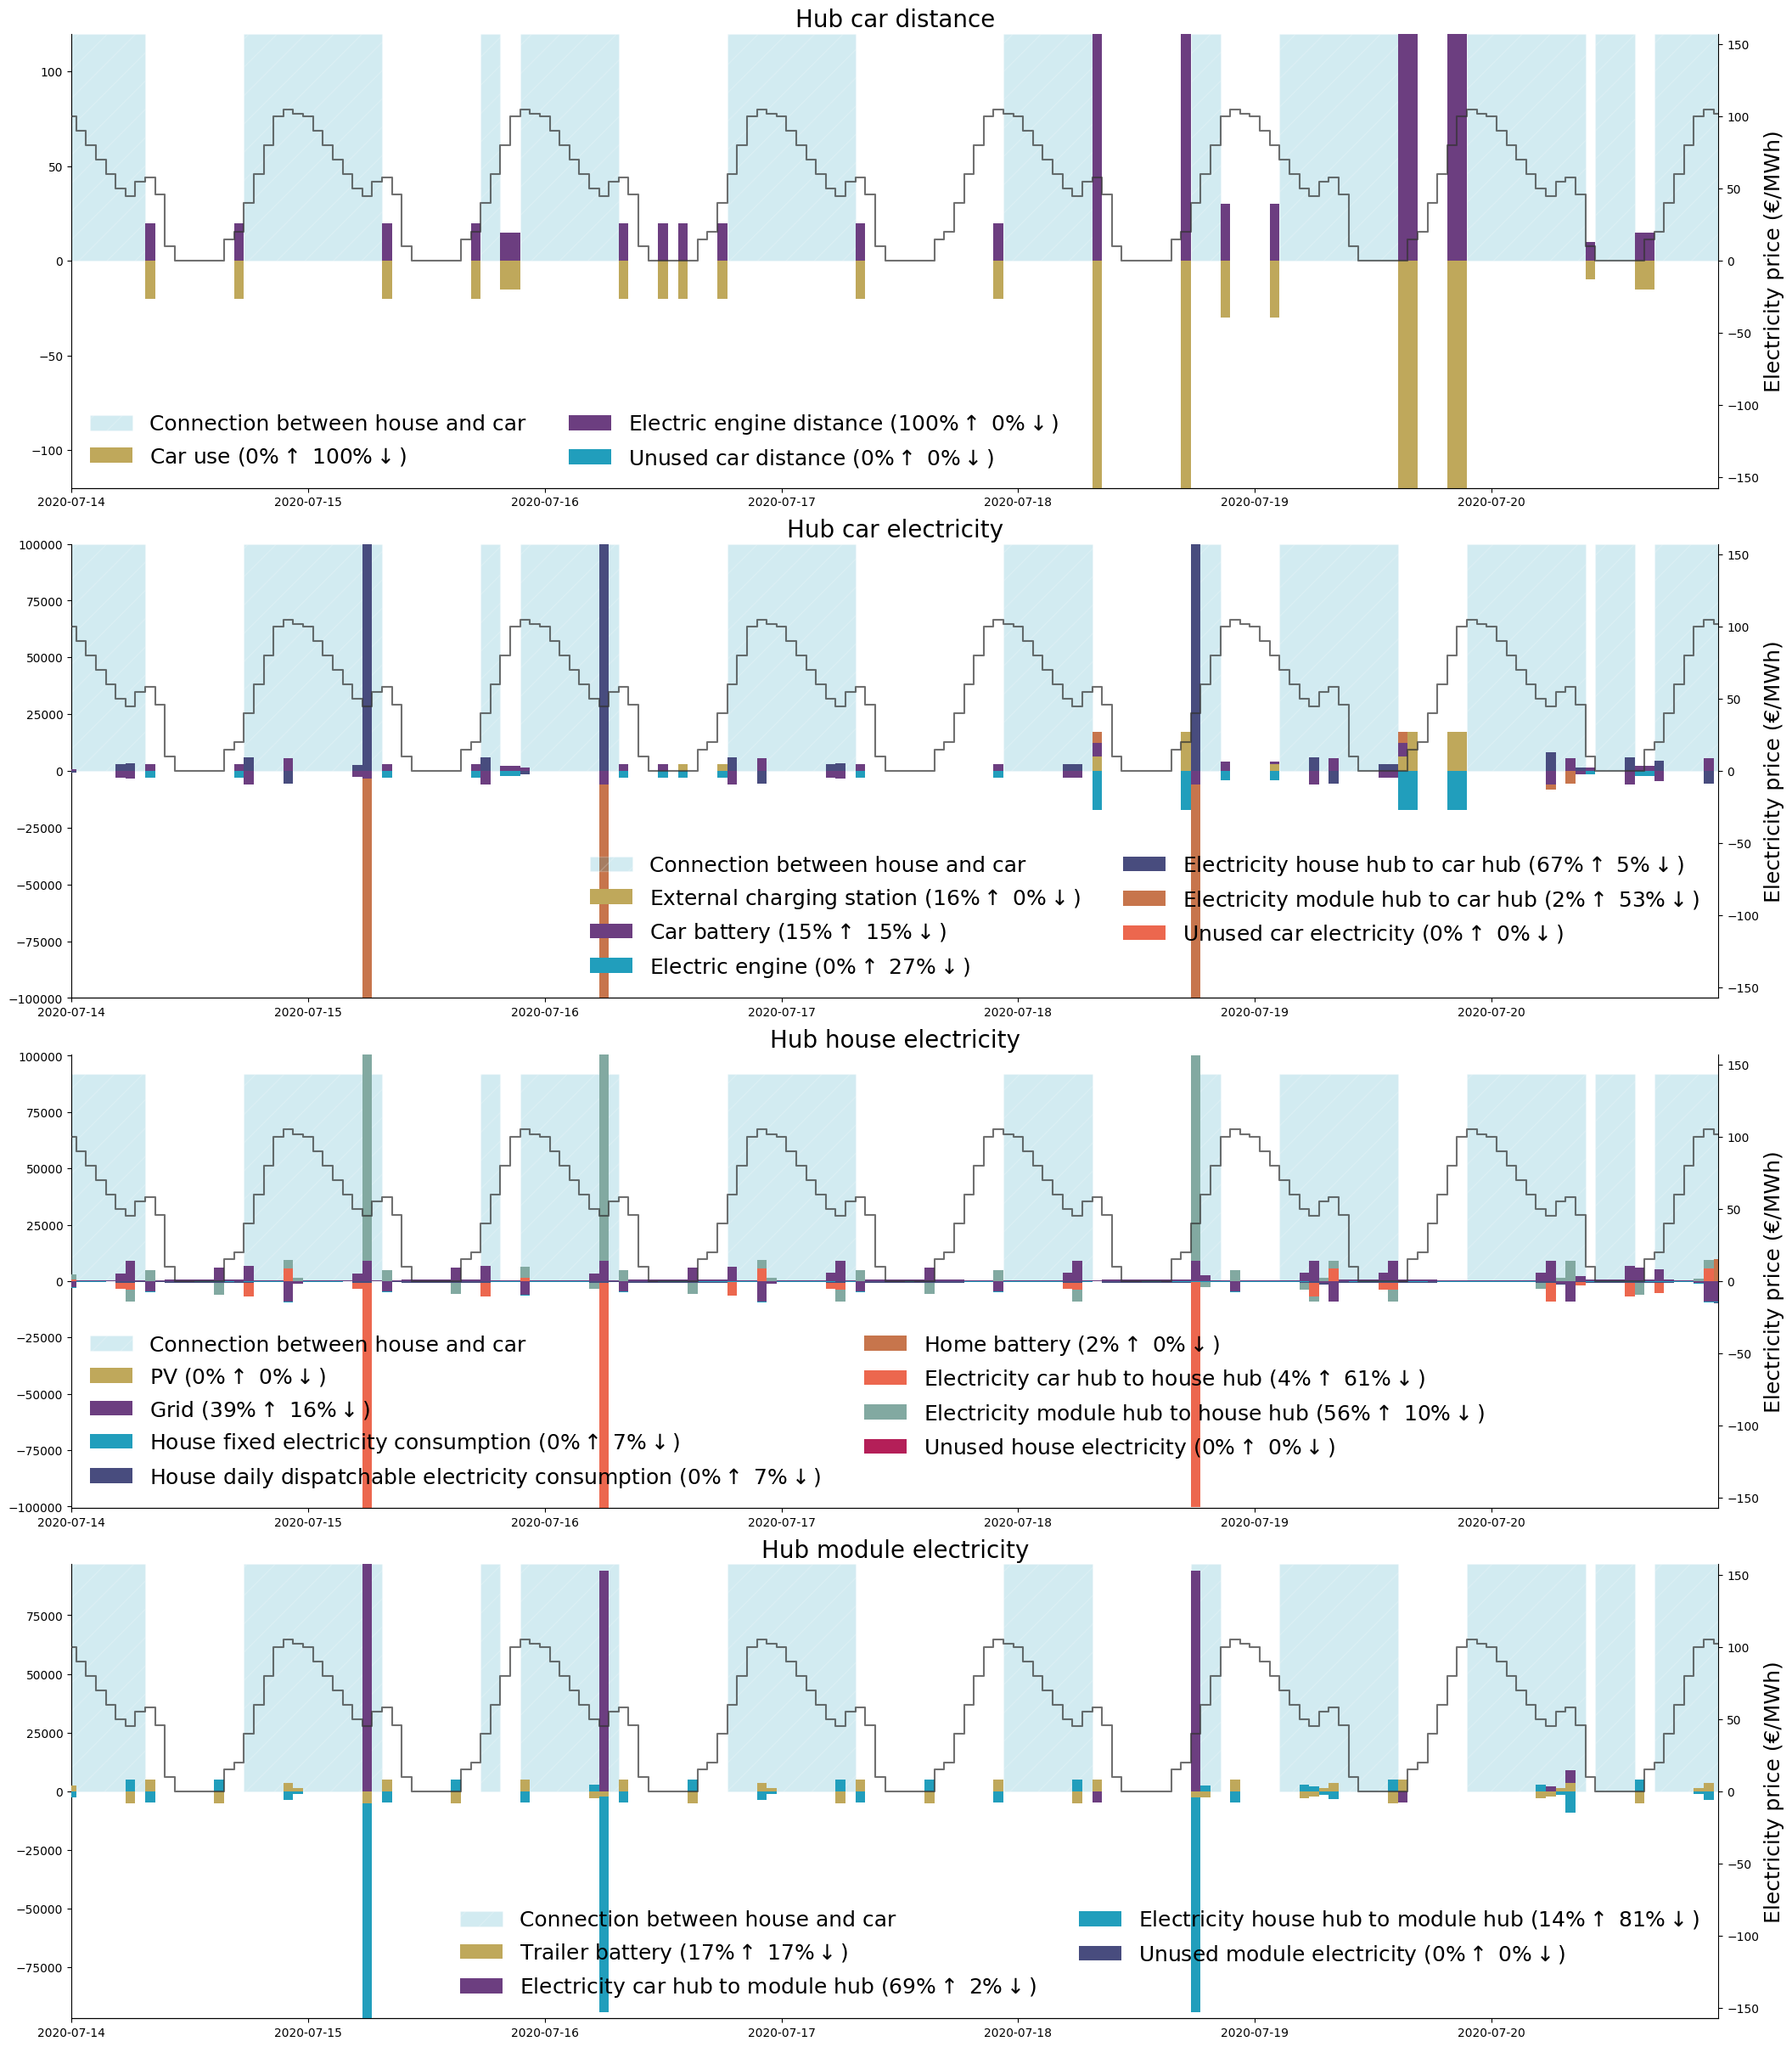

In [406]:
H.plot_hubs(co=True, env1='house', env2='car', price=('data_sample.csv//Electricity_price (euros/MWh)', 'hourly', 'Electricity price (€/MWh)'))

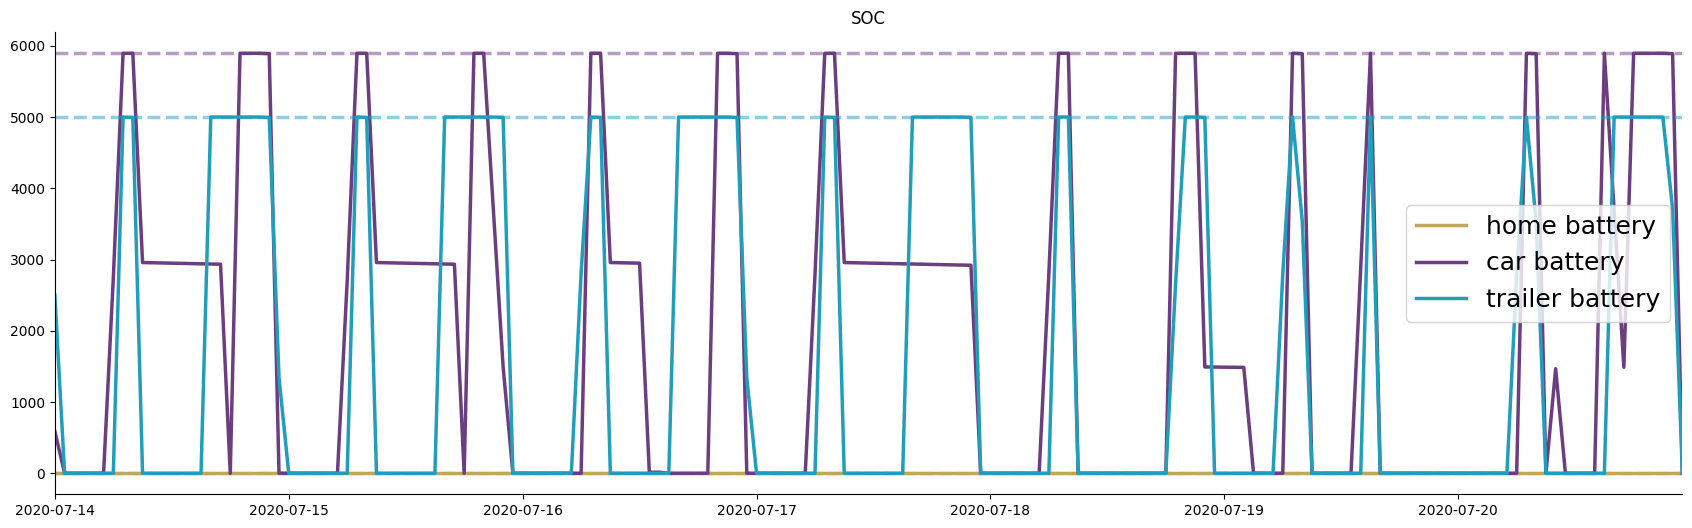

In [407]:
H.plot_SOC()

In [312]:
H.objective_value

np.float64(30.224051794416003)

In [344]:
H.get_design(components=['car_battery', 'home_battery', 'PV'],
             factors=['volume_factor', 'volume_factor', 'factor'],
             units=['kWh', 'kWh', 'kWhc'])

,car_battery (kWh),home_battery (kWh),PV (kWhc)
volume_factor,5.895143,0.0,NaN
factor,NaN,NaN,0.0


In [399]:
vars_in = [var.value() for var in H.environmentsConnections['house_car'].vars_in['electricity']]

In [401]:
H.environmentsConnections['house_car'].cost_in

1e-08

In [404]:
min(vars_in)

0.0

In [392]:
H.model.objective

2.4*PV_factor + 1.28*car_battery_volume_factor + 1e-08*electricity_car_hub_to_house_hub_167 + 1e-08*electricity_car_hub_to_module_hub_167 + 1e-08*electricity_house_hub_to_car_hub_167 + 1e-08*electricity_house_hub_to_module_hub_167 + 1e-08*electricity_module_hub_to_car_hub_167 + 1e-08*electricity_module_hub_to_house_hub_167 + 0.0002*external_charging_station_to_hub_0 + 0.0002*external_charging_station_to_hub_1 + 0.0002*external_charging_station_to_hub_10 + 0.0002*external_charging_station_to_hub_100 + 0.0002*external_charging_station_to_hub_101 + 0.0002*external_charging_station_to_hub_102 + 0.0002*external_charging_station_to_hub_103 + 0.0002*external_charging_station_to_hub_104 + 0.0002*external_charging_station_to_hub_105 + 0.0002*external_charging_station_to_hub_106 + 0.0002*external_charging_station_to_hub_107 + 0.0002*external_charging_station_to_hub_108 + 0.0002*external_charging_station_to_hub_109 + 0.0002*external_charging_station_to_hub_11 + 0.0002*external_charging_station_to